In [1]:
import cv2
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import os
import pandas as pd

In [62]:
img = cv2.imread('../env/My Dataset3/Alvin (22).jpg')

In [63]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

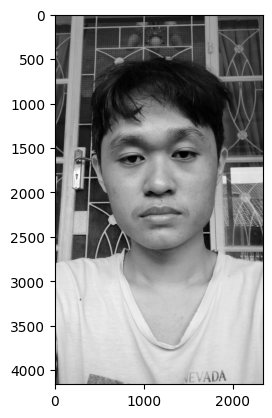

In [64]:
plt.imshow(img_gray, cmap='gray')

In [65]:
img_gray.shape

(4160, 2340)

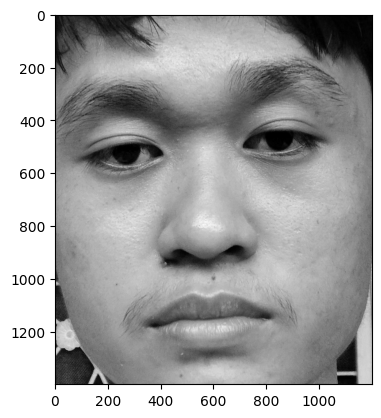

In [72]:
roi = img_gray[1100:2500, 600:1800]
plt.imshow(roi, cmap='gray')

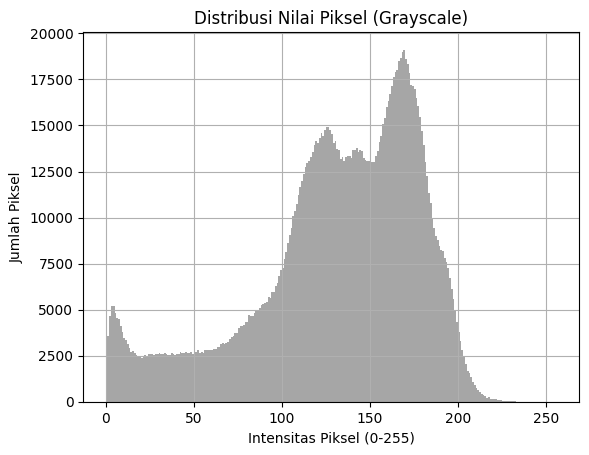

In [73]:
plt.hist(roi.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Distribusi Nilai Piksel (Grayscale)')
plt.xlabel('Intensitas Piksel (0-255)')
plt.ylabel('Jumlah Piksel')
plt.grid(True)
plt.show()

In [960]:
roi.shape

(1250, 1125)

In [680]:
# Fungsi baru untuk ekstraksi fitur GLCM
def extract_glcm_features(image):
    # Kuantisasi gambar untuk mengurangi level intensitas
    levels = 8
    image_quantized = (image // (256 // levels)).astype('uint8')

    # Definisikan jarak dan sudut
    distances = [1, 2]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0°, 45°, 90°, 135°

    # Hitung GLCM
    glcm = graycomatrix(image_quantized, 
                       distances=distances,
                       angles=angles,
                       levels=levels,
                       symmetric=True,
                       normed=True)

    # Ekstrak properti GLCM
    properties = ['homogeneity', 'energy', 'correlation', 'entropy']
    features = []

    for prop in properties:
        feature = graycoprops(glcm, prop)
        features.extend(feature.flatten())  

    return np.array(features)

In [472]:

properties = ['homogeneity', 'energy', 'correlation', 'entropy']
distances = [1, 2]
angles = [0, 45, 90, 135]  

feature_names = []

for prop in properties:
    for d in distances:
        for a in angles:
            feature_names.append(f'{prop}_d{d}_a{a}')

print(feature_names)
print(f"Total kolom: {len(feature_names)}")


['homogeneity_d1_a0', 'homogeneity_d1_a45', 'homogeneity_d1_a90', 'homogeneity_d1_a135', 'homogeneity_d2_a0', 'homogeneity_d2_a45', 'homogeneity_d2_a90', 'homogeneity_d2_a135', 'energy_d1_a0', 'energy_d1_a45', 'energy_d1_a90', 'energy_d1_a135', 'energy_d2_a0', 'energy_d2_a45', 'energy_d2_a90', 'energy_d2_a135', 'correlation_d1_a0', 'correlation_d1_a45', 'correlation_d1_a90', 'correlation_d1_a135', 'correlation_d2_a0', 'correlation_d2_a45', 'correlation_d2_a90', 'correlation_d2_a135', 'entropy_d1_a0', 'entropy_d1_a45', 'entropy_d1_a90', 'entropy_d1_a135', 'entropy_d2_a0', 'entropy_d2_a45', 'entropy_d2_a90', 'entropy_d2_a135']
Total kolom: 32


In [39]:
def process(roi, filename):
    features_list = []
    file_names = []


    resized_face = cv2.resize(roi, (128, 128))
                            
                            # Ekstrak fitur GLCM
    glcm_features = extract_glcm_features(resized_face)
                            
                            # Simpan hasil
    features_list.append(glcm_features)
    file_names.append(filename)

    plt.imshow(resized_face, cmap='gray')

    return np.array(features_list), file_names

In [18]:
def save_features_to_csv(features, filenames, output_file):
    # Definisikan kolom
    # columns = ['filename'] + [f'feature_{i}' for i in range(features.shape[1])]

    columns = ['filename'] + feature_names
    
    # Buat DataFrame
    data = np.hstack((np.array(filenames).reshape(-1, 1), features))
    print(f"Shape of data: {data.shape}, Shape of columns: {len(columns)}")
    df = pd.DataFrame(data, columns=columns)

    df.to_csv(output_file, index=False)

In [40]:
def df_features(features, filenames):
    # Definisikan kolom
    # columns = ['filename'] + [f'feature_{i}' for i in range(features.shape[1])]

    columns = ['filename'] + feature_names
    
    # Buat DataFrame
    data = np.hstack((np.array(filenames).reshape(-1, 1), features))
    print(f"Shape of data: {data.shape}, Shape of columns: {len(columns)}")
    df = pd.DataFrame(data, columns=columns)

    return df

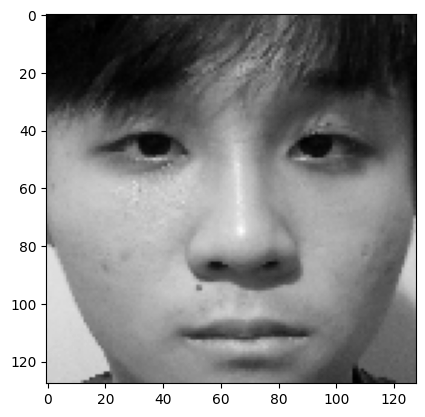

In [961]:
features_list, file_names = process(roi, 'Vincent (15).jpg')

In [962]:
# save_features_to_csv(features_list, file_names, 'manual_ekstrak.csv')
df_baru = df_features(features_list, file_names)
df_baru

Shape of data: (1, 33), Shape of columns: 33


,filename,homogeneity_d1_a0,homogeneity_d1_a45,homogeneity_d1_a90,homogeneity_d1_a135,homogeneity_d2_a0,homogeneity_d2_a45,homogeneity_d2_a90,homogeneity_d2_a135,energy_d1_a0,...,correlation_d2_a90,correlation_d2_a135,entropy_d1_a0,entropy_d1_a45,entropy_d1_a90,entropy_d1_a135,entropy_d2_a0,entropy_d2_a45,entropy_d2_a90,entropy_d2_a135
0,Vincent (15).jpg,0.9208697603056971,0.8905654046602212,0.9127554712830013,0.9011145434055575,0.8832053133753501,0.8905654046602212,0.8637486925860087,0.9011145434055575,0.36313051139386976,...,0.9217910744067219,0.9505601109622568,2.294126496553935,2.432444450575951,2.3369781186500713,2.3940571421620738,2.462984868939844,2.432444450575951,2.5513161746687176,2.3940571421620738


In [963]:
df_lama = pd.read_csv('manual_ekstrak.csv')
df_lama

,filename,homogeneity_d1_a0,homogeneity_d1_a45,homogeneity_d1_a90,homogeneity_d1_a135,homogeneity_d2_a0,homogeneity_d2_a45,homogeneity_d2_a90,homogeneity_d2_a135,energy_d1_a0,...,correlation_d2_a90,correlation_d2_a135,entropy_d1_a0,entropy_d1_a45,entropy_d1_a90,entropy_d1_a135,entropy_d2_a0,entropy_d2_a45,entropy_d2_a90,entropy_d2_a135
0,Albert (13).jpg,0.907365,0.884883,0.915259,0.891396,0.866505,0.884883,0.870828,0.891396,0.468442,...,0.863188,0.893910,2.095770,2.183568,2.051168,2.156893,2.267989,2.183568,2.233947,2.156893
1,Albert (31).jpg,0.908095,0.888261,0.915259,0.888534,0.869454,0.888261,0.876413,0.888534,0.505134,...,0.885006,0.911653,1.975721,2.057557,1.958164,2.048366,2.125598,2.057557,2.117783,2.048366
2,Ritter (3).jpg,0.893321,0.857562,0.876044,0.859799,0.859770,0.857562,0.824901,0.859799,0.394195,...,0.877873,0.907983,2.293007,2.423140,2.351702,2.420876,2.430765,2.423140,2.544825,2.420876
3,Ritter (7).jpg,0.892246,0.864386,0.880661,0.865988,0.858202,0.864386,0.834725,0.865988,0.375847,...,0.882438,0.901419,2.404675,2.517522,2.442063,2.512096,2.549043,2.517522,2.628417,2.512096
4,Ritter (25).jpg,0.947440,0.914587,0.931889,0.923246,0.911968,0.914587,0.886461,0.923246,0.472448,...,0.903169,0.934955,1.935136,2.096782,2.016681,2.059260,2.111363,2.096782,2.222284,2.059260
5,Alvin (4).jpg,0.890986,0.859737,0.885437,0.856565,0.842292,0.859737,0.835677,0.856565,0.337729,...,0.912930,0.927837,2.567458,2.696472,2.589527,2.713589,2.770896,2.696472,2.792037,2.713589
6,Alvin (17).jpg,0.903773,0.878213,0.891160,0.873752,0.863617,0.878213,0.844846,0.873752,0.406375,...,0.834012,0.881030,2.314936,2.422108,2.371966,2.449296,2.482426,2.422108,2.568232,2.449296
7,Alvin (27).jpg,0.892208,0.841905,0.862621,0.843282,0.840975,0.841905,0.798860,0.843282,0.372760,...,0.845642,0.886794,2.433219,2.634672,2.550098,2.628015,2.628743,2.634672,2.781956,2.628015
8,Alvin (28).jpg,0.890131,0.841554,0.862100,0.840002,0.835298,0.841554,0.794753,0.840002,0.374451,...,0.843058,0.892201,2.416475,2.604755,2.524031,2.611587,2.618882,2.604755,2.765433,2.611587
9,Alvin (29).jpg,0.906063,0.860249,0.888938,0.874645,0.854360,0.860249,0.830472,0.874645,0.318493,...,0.935469,0.961932,2.595926,2.798638,2.679679,2.732229,2.808651,2.798638,2.922737,2.732229


In [964]:
df_gabungan = pd.concat([df_lama, df_baru], ignore_index=True)

In [965]:
df_gabungan.to_csv('manual_ekstrak.csv', index=False)
df_gabungan

,filename,homogeneity_d1_a0,homogeneity_d1_a45,homogeneity_d1_a90,homogeneity_d1_a135,homogeneity_d2_a0,homogeneity_d2_a45,homogeneity_d2_a90,homogeneity_d2_a135,energy_d1_a0,...,correlation_d2_a90,correlation_d2_a135,entropy_d1_a0,entropy_d1_a45,entropy_d1_a90,entropy_d1_a135,entropy_d2_a0,entropy_d2_a45,entropy_d2_a90,entropy_d2_a135
0,Albert (13).jpg,0.907365,0.884883,0.915259,0.891396,0.866505,0.884883,0.870828,0.891396,0.468442,...,0.863188,0.89391,2.09577,2.183568,2.051168,2.156893,2.267989,2.183568,2.233947,2.156893
1,Albert (31).jpg,0.908095,0.888261,0.915259,0.888534,0.869454,0.888261,0.876413,0.888534,0.505134,...,0.885006,0.911653,1.975721,2.057557,1.958164,2.048366,2.125598,2.057557,2.117783,2.048366
2,Ritter (3).jpg,0.893321,0.857562,0.876044,0.859799,0.85977,0.857562,0.824901,0.859799,0.394195,...,0.877873,0.907983,2.293007,2.42314,2.351702,2.420876,2.430765,2.42314,2.544825,2.420876
3,Ritter (7).jpg,0.892246,0.864386,0.880661,0.865988,0.858202,0.864386,0.834725,0.865988,0.375847,...,0.882438,0.901419,2.404675,2.517522,2.442063,2.512096,2.549043,2.517522,2.628417,2.512096
4,Ritter (25).jpg,0.94744,0.914587,0.931889,0.923246,0.911968,0.914587,0.886461,0.923246,0.472448,...,0.903169,0.934955,1.935136,2.096782,2.016681,2.05926,2.111363,2.096782,2.222284,2.05926
5,Alvin (4).jpg,0.890986,0.859737,0.885437,0.856565,0.842292,0.859737,0.835677,0.856565,0.337729,...,0.91293,0.927837,2.567458,2.696472,2.589527,2.713589,2.770896,2.696472,2.792037,2.713589
6,Alvin (17).jpg,0.903773,0.878213,0.89116,0.873752,0.863617,0.878213,0.844846,0.873752,0.406375,...,0.834012,0.88103,2.314936,2.422108,2.371966,2.449296,2.482426,2.422108,2.568232,2.449296
7,Alvin (27).jpg,0.892208,0.841905,0.862621,0.843282,0.840975,0.841905,0.79886,0.843282,0.37276,...,0.845642,0.886794,2.433219,2.634672,2.550098,2.628015,2.628743,2.634672,2.781956,2.628015
8,Alvin (28).jpg,0.890131,0.841554,0.8621,0.840002,0.835298,0.841554,0.794753,0.840002,0.374451,...,0.843058,0.892201,2.416475,2.604755,2.524031,2.611587,2.618882,2.604755,2.765433,2.611587
9,Alvin (29).jpg,0.906063,0.860249,0.888938,0.874645,0.85436,0.860249,0.830472,0.874645,0.318493,...,0.935469,0.961932,2.595926,2.798638,2.679679,2.732229,2.808651,2.798638,2.922737,2.732229
